In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [4]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

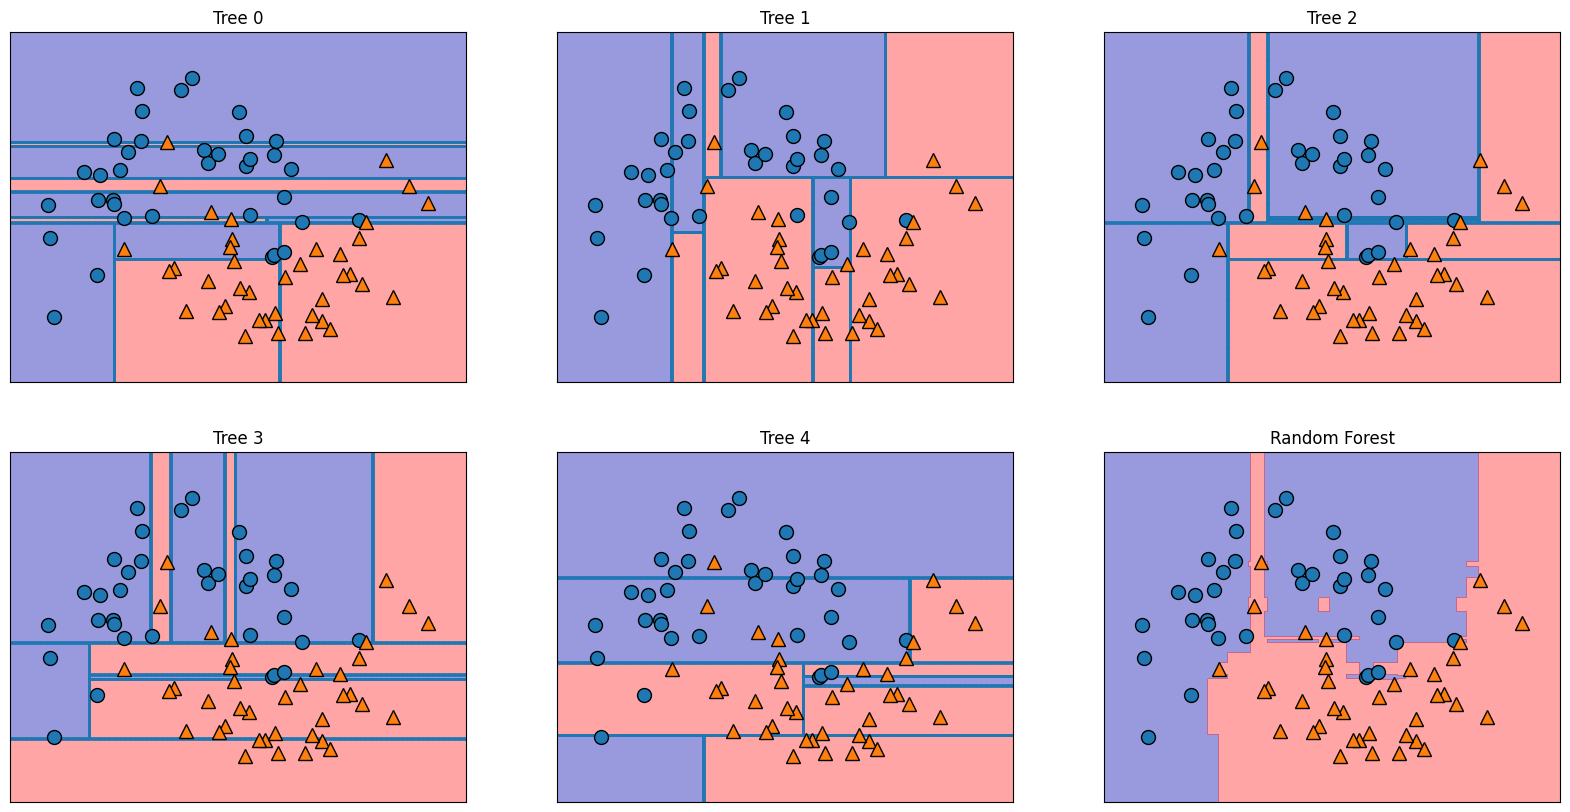

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"Tree {i}")
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=0.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [10]:
cancer = load_breast_cancer()

In [12]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], test_size=0.25, random_state=0)

In [15]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [16]:
print(f"Accuracy on training set: {forest.score(X_train, y_train)}")
print(f"Accuracy on test set: {forest.score(X_test, y_test)}")

Accuracy on training set: 1.0
Accuracy on test set: 0.972027972027972
